# Routing

# http methods decrie 'intent', they express what of request..i.e. what to do with  data, and telling server what your intnestion is like geettiong data

# it expereeses where,,, 



i need to <intent:fetch> data from <where:x.com>

You're mixing the axes. Fix it like this:

**HTTP methods describe the *intent/action*.**
Examples:

* **GET** → fetch something
* **POST** → create something
* **PUT** → replace something
* **PATCH** → modify something
* **DELETE** → remove something

That's it. They tell the server **what you want to do**.

**The URL describes the *target/resource*.**
Examples:

* `/users/123`
* `/orders`
* `/products/5/images`

That tells the server **where** to apply the intent.

So the structure is:

**Intent (HTTP method) + Target (URL) + Optional body (data).**

Example:
“I need to **fetch** data from **x.com/users**.” =
`GET https://x.com/users`

Another example:
“I need to **create** a user at **x.com/users**.” =
`POST https://x.com/users {…json…}`

You don’t need to overthink it. HTTP method = verb. URL = noun.


# so routing is casicallly mapping url parameters to server side logic

Exactly. Routing is nothing magical.

**Routing = match an incoming URL + method → run the correct server logic.**

Example:
`GET /users/42` → call `getUserById(42)`
`POST /users` → call `createUser()`
`DELETE /users/42` → call `deleteUser(42)`

A router just extracts:

* the **path** (`/users/42`)
* the **parameters** (`42`)
* the **method** (GET/POST/…)

…and calls the correct handler function.

That's all it is.


![Screenshot 2025-12-11 at 7.55.39 PM.png](<attachment:Screenshot 2025-12-11 at 7.55.39 PM.png>)

Yes — **“books” is the resource**.
More precisely: **/api/books** represents a *collection resource*, and individual books like `/api/books/1` are *item resources*.

Breakdown:

---

## ✅ **Resource**

A resource = *the thing your API exposes*.

Here:

* **/api/books** → collection of book resources
* **/api/books/1** → a single book resource

---

## 🧠 Why “books” is the resource?

Resources in REST are **nouns**, not verbs.

Examples:

| URL                     | Resource                    |
| ----------------------- | --------------------------- |
| `/api/books`            | list of books               |
| `/api/books/1`          | book with id 1              |
| `/api/users/10/orders`  | orders belonging to user 10 |
| `/api/posts/5/comments` | comments of post 5          |

---

## 🧩 Methods describe “intent”

The HTTP method defines **what action** you want on that resource:

| Method              | Intent              |
| ------------------- | ------------------- |
| GET /api/books      | retrieve list       |
| POST /api/books     | create book         |
| GET /api/books/1    | fetch book          |
| PUT /api/books/1    | replace book        |
| PATCH /api/books/1  | update part of book |
| DELETE /api/books/1 | delete book         |

---

## Summary

You got it:

* **books = resource**
* **/api/books = resource endpoint**
* **HTTP method = action on that resource**

If you want, I can show you a clean mental model for REST in a 1-page cheat sheet.

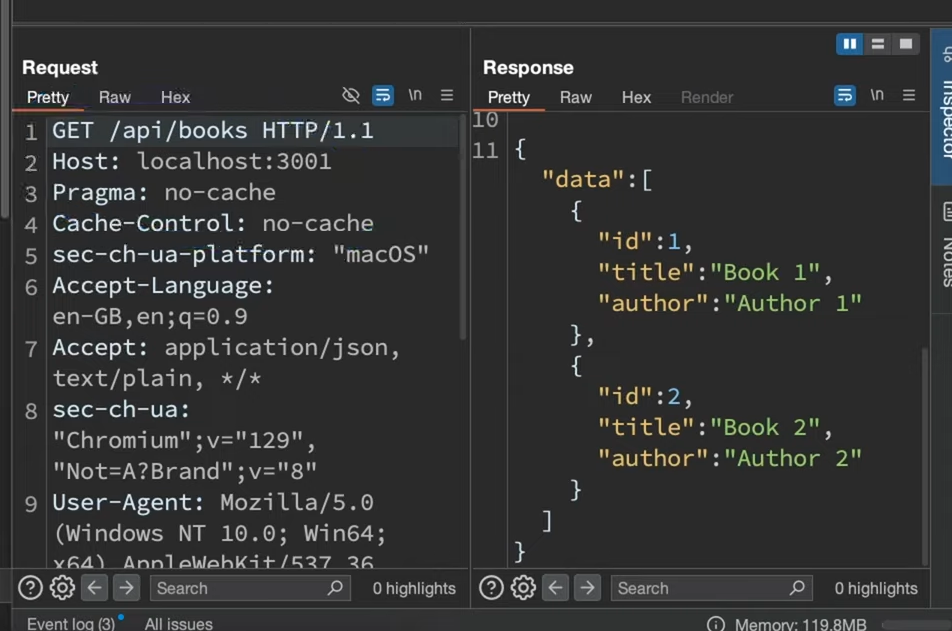

# Static vs dynamic routes is extremely simple — don’t overthink it.

---

# ✅ Static Route

A **static route** matches **exactly one fixed path**.
Nothing changes, no variables, no parameters.

### Examples

```
/api/books
/api/about
/api/health
```

### Characteristics

* Always the same URL
* Server doesn't extract anything from the path
* Maps directly to a specific handler
* Usually used for **collections** or **fixed endpoints**

---

# ✅ Dynamic Route

A **dynamic route** contains **variables** (path parameters).
You use it when the path depends on some value (id, slug, username, etc).

### Examples

```
/api/books/:id
/api/users/:userId/posts/:postId
/api/products/:sku
```

These routes match multiple possible URLs:

```
/api/books/1
/api/books/123
/api/books/999
```

### Characteristics

* Contains parameters
* Server extracts variables from the path
* Usually used for **individual items**

Example in Express:

```js
app.get('/api/books/:id', (req, res) => {
    console.log(req.params.id); // dynamic part
});
```

---

# 🧨 The Core Difference (Short & Direct)

| Static Route               | Dynamic Route                        |
| -------------------------- | ------------------------------------ |
| Matches **one fixed path** | Matches **a pattern**                |
| No parameters              | Has path parameters                  |
| `/api/books`               | `/api/books/:id`                     |
| Same behavior every time   | Behavior depends on extracted values |

---

If you want, I can also explain **query params vs dynamic params**, because people often mix those up too.


Here’s the **clean, direct distinction** — no fluff.

---

# ✅ 1. `/api/search?query=some value`

This uses **query parameters**.

### Key points:

* Goes **after `?`**
* Used for **filtering, searching, sorting, pagination**, etc.
* **Does NOT define the resource.**
* Resource is still:

  ```
  /api/search
  ```

### Server receives:

```js
req.query.query   // → "some value"
```

### Example use cases:

```
/api/products?category=clothes&limit=10
/api/users?sort=asc
/api/search?query=apple
```

---

# ✅ 2. `/api/books/1`

This uses a **route parameter (dynamic path)**.

### Key points:

* Part of the **path itself**
* Defines **which specific resource** you want
* Typically used for **IDs**, slugs, usernames

### Server receives:

```js
req.params.id   // → "1"
```

### Example use cases:

```
/api/books/1
/api/users/47
/api/posts/99/comments/12
```

---

# 🎯 The REAL Difference (Stop Mixing Them)

| Query Params (`?key=value`)   | Path Params (`:param`)        |
| ----------------------------- | ----------------------------- |
| Modify or filter a request    | Identify a specific resource  |
| Optional                      | Required (usually)            |
| Not part of resource identity | Part of the resource identity |
| `/api/search?query=x`         | `/api/books/1`                |

---

# 🧠 Quick rule to remember

* **If removing the value changes WHICH thing you’re fetching → path param**
  `/api/books/1` → removing `1` no longer identifies the same resource

* **If removing the value just changes HOW the server returns it → query param**
  `/api/search?query=hello` → removing query means “search nothing”, endpoint still valid

---

If you want, I can give you **5 examples and ask you to classify each**, to make sure you truly understand it.


# in post requst we have body, in get request in rest api we dont have bodies, 

technically you can do this  /api/search/some value. but it hard to mantiant and it defeats whole purpose of rest api, proiving semantic expersiiojn to api endpoints. vthats why we use query paramters

Your **intention is right**, but your explanation is sloppy. Here’s the precise, correct version you should say:

---

## ✅ Correct Explanation

In REST:

### **GET requests must not have a body**

Technically the HTTP spec allows it,
but **no browser, no proxy, no CDN, and no REST framework supports it reliably**.

So REST treats GET as:

* No body
* All parameters must be in the URL (path or query)

---

## Why `/api/search/some value` is a bad idea

Yes, you *could* put the search term in the path:

```
/api/search/some value
```

But it's **bad REST design** because:

1. **Path should identify a resource**, not an action or free-form text
2. Path segments are messy for search terms (spaces, symbols, encoding hell)
3. Query parameters are designed *exactly* for searches and filters
4. Maintaining multiple filters becomes impossible

   ```
   /api/search/value/sort/date/page/2   ← garbage
   ```
5. Harder to cache and reason about

---

## Why we use query parameters for search

Because they express **filters**, not resources:

```
/api/search?query=some value
```

That fits REST perfectly:

* Path = **what** you are accessing (`/api/search`)
* Query = **how** you want it (`query=some value`)

REST is based on semantics.
Using query params communicates the intention clearly:

> "Get the search resource, filtered by this query."

---

## Final clean version you should say

**In REST, GET requests don’t use bodies.
Search terms and filters go in query parameters because the path is meant to identify resources, while query params describe filtering or querying behavior.
Putting search text inside the path makes the API harder to maintain and breaks REST semantics.**

---

If you want, I can show you:

* 10 good REST endpoint examples
* 10 bad ones (and why they're bad)


# earch terms and filters go in query parameters because the path is meant to identify resources, while query params describe filtering or querying behavior.

# path is meant to identify resources
# query params descibe filterig or query behavior

Pagination = **splitting a large result set into smaller chunks**, so the client doesn’t fetch 10,000 items at once.

Here’s the clean, correct explanation you should give:

---

# ✅ Why We Need Pagination

Because:

* Large datasets overwhelm the server
* Response size becomes huge
* Slow UI
* Waste of bandwidth
* Expensive queries

So instead of returning **all** items, you return **one page at a time**.

---

# ✅ How Pagination Is Done in REST APIs

### **1. Query Parameters (Most common)**

```
GET /api/books?page=2&limit=20
```

* `page` → which page
* `limit` → how many items per page

---

### **2. Cursor-Based Pagination (for large/real-time data)**

Better for infinite scroll, high scale, or sorted data.

```
GET /api/books?cursor=af3e91&limit=20
```

Server returns:

```json
{
  "data": [...],
  "nextCursor": "af3e9c"
}
```

This avoids issues with:

* large offsets
* data changing while paginating

---

### **3. Offset-Based Pagination**

```
GET /api/books?offset=40&limit=20
```

Page 3 with limit 20 = offset 40.

Slower on very large tables but simple.

---

# ✅ Why Query Parameters (NOT Path) Are Used for Pagination

Because:

* Pagination isn’t a “resource” → it’s a **view** or **filter** over a resource
* Path should stay stable
* Pagination settings vary (page, limit, sort, filter, search)

Path:

```
/api/books      → resource
```

Query modifies the view:

```
/api/books?page=2&limit=20
```

---

# ✅ What You Should Say (clean version)

**Pagination splits large datasets into smaller chunks. In REST, it's done using query parameters like `page`, `limit`, `offset`, or `cursor`. The path identifies the resource, and the query parameters describe how the client wants the data (e.g., which page).**

---

If you want, I can also explain:

* cursor vs offset (with examples)
* which one to use in real projects
* how databases implement both internally


# **Nested routing = routes that represent a parent–child relationship between resources.**

![Screenshot 2025-12-12 at 4.35.32 PM.png](<attachment:Screenshot 2025-12-12 at 4.35.32 PM.png>)
It reflects the hierarchy of your data.

If one resource *belongs to* or *lives under* another, you express that relationship in the URL.

---

# ✅ What Nested Routing Looks Like

### **Example: Books → Chapters**

**Parent resource:**

```
/api/books
/api/books/10
```

**Child resource nested inside parent:**

```
/api/books/10/chapters
/api/books/10/chapters/3
```

This means:

* “Chapters of book 10”
* “Chapter 3 of book 10”

The route shows the hierarchy directly.

---

# 🔥 Why Use Nested Routes?

### **1. They express ownership / hierarchy clearly**

Chapter cannot exist without a book → so chapter lives inside book.

### **2. They prevent ambiguous paths**

If your API had both:

```
/api/chapters/3
```

Is it from Book 10? 11? 99?
Nested route removes confusion.

### **3. They make filtering implicit**

You don’t need:

```
/api/chapters?bookId=10
```

Nested already implies the filter:

```
/api/books/10/chapters
```

---

# 🧠 When to Use Nested Routing

Use it when:

* child resource **only makes sense** in the context of a parent
* there is a **strong parent-child relationship**
* child **cannot exist independently**

Examples:

* `/users/42/orders`
* `/orders/10/items`
* `/projects/3/tasks`
* `/courses/12/students`

---

# ❌ When NOT to Use Nested Routing

Don’t nest when:

* the child can exist independently
* you risk going too deep (never nest more than 2 levels)

Bad example:

```
/api/companies/1/departments/2/employees/5/salaries/4/details
```

This becomes a mess.

Limit nesting to **one level deep**:

```
/api/departments/2/employees/5
```

Not:

```
/api/companies/1/departments/2/employees/5
```

---

# 🌟 Clean Summary (this is the one-liner you should memorize)

**Nested routing maps hierarchical relationships directly into the URL so child resources sit under parent resources in the path (e.g., `/books/10/chapters/3`).**

---

If you want, I can give you:

* nested routing examples in Express.js
* nested routing examples in Next.js
* how REST frameworks actually parse nested params (req.params)

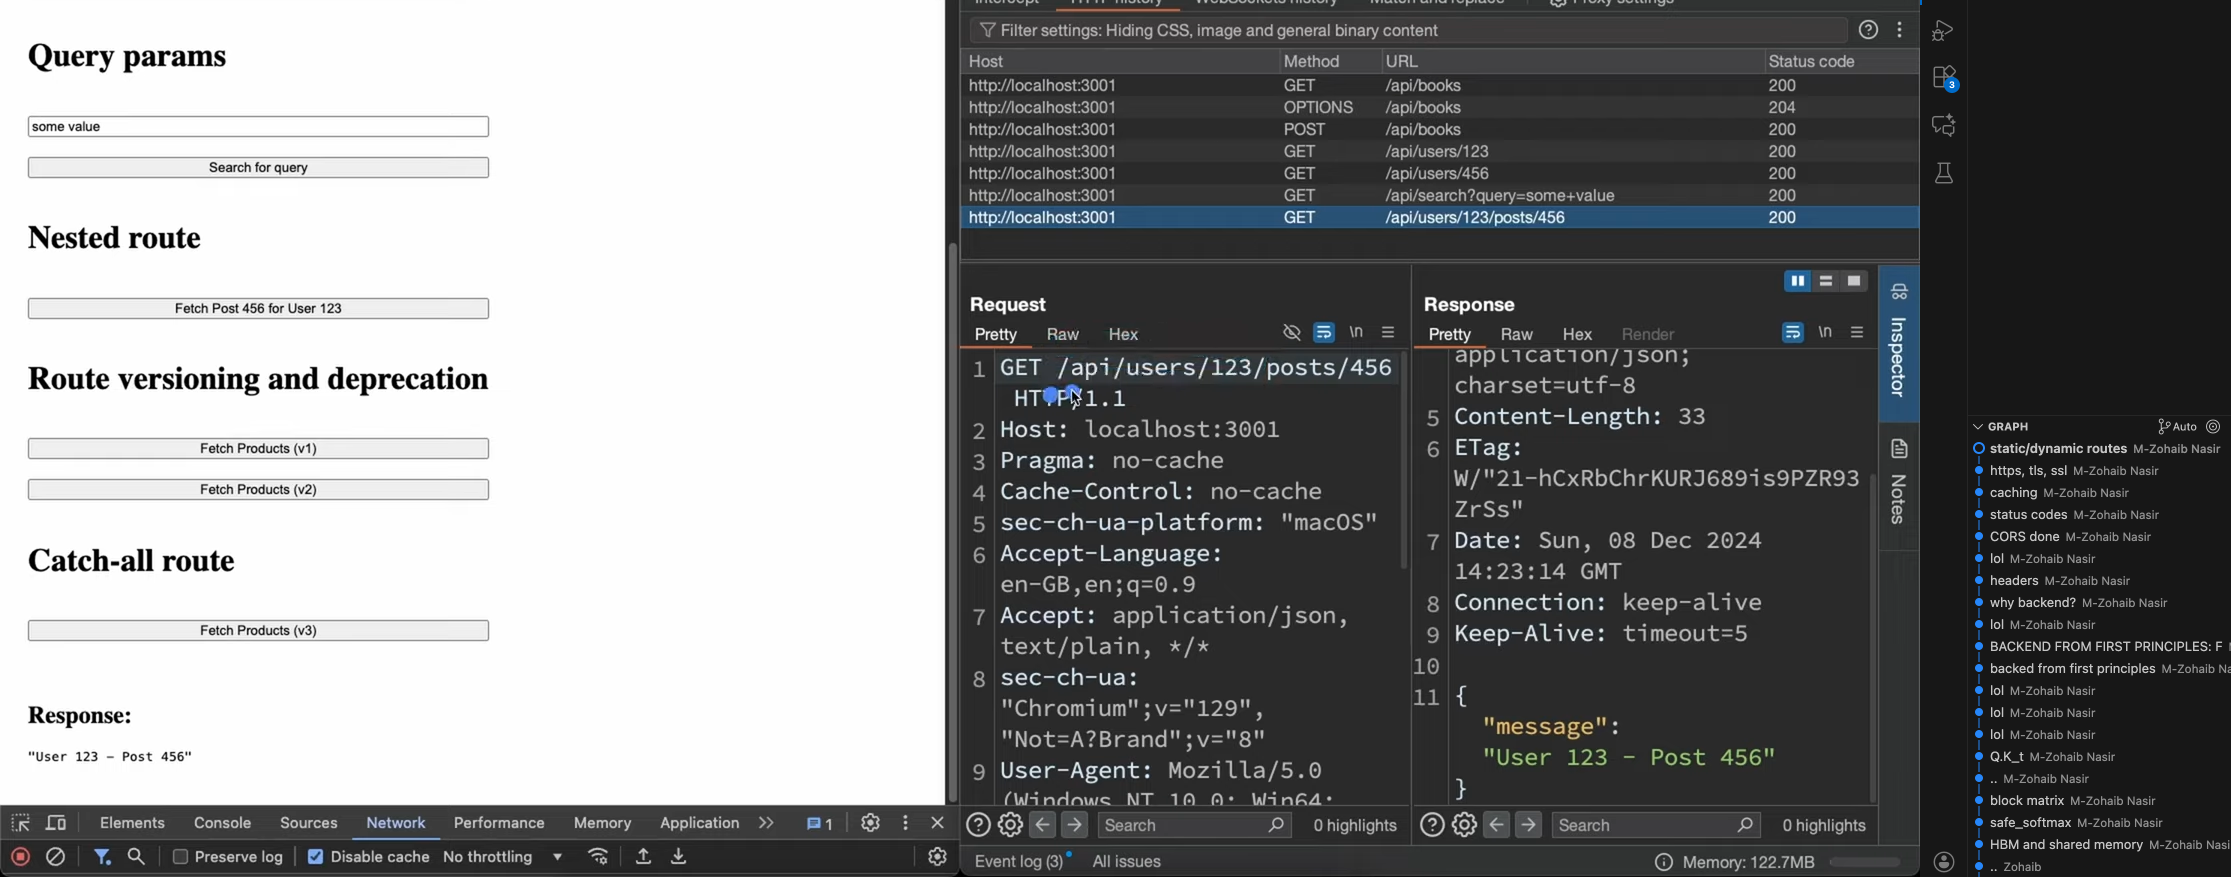

You’re clearly trying to understand **what that screenshot shows** and **how nested routing works in practice**.
I’ll break it down directly.

---

# ✔️ What’s happening in your screenshot

The highlighted request is:

```
GET /api/users/123/posts/456
```

This is a **nested route** with **two dynamic params**:

* `userId = 123`
* `postId = 456`

Your server returned:

```json
{
  "message": "User 123 – Post 456"
}
```

This proves your backend correctly extracted both parameters.

---

# ✔️ What the UI buttons represent

### **1. Query params**

You triggered something like:

```
GET /api/search?query=some+value
```

Simple query param demonstration.

---

### **2. Nested route**

Button sends:

```
GET /api/users/123/posts/456
```

This is showing hierarchical routing:

* A **user** has **posts**
* So request path expresses that relationship

---

### **3. Route versioning & deprecation**

Buttons for:

```
/api/products (v1)
/api/products (v2)
```

You’re comparing v1 vs v2 endpoints.

---

### **4. Catch-all route**

Probably something like:

```
/api/products/*
```

Shows how your server handles any “remaining” route that matches.

---

# ✔️ Backend interpretation (what your server is doing)

In Express.js, it would look like:

```js
app.get('/api/users/:userId/posts/:postId', (req, res) => {
  const { userId, postId } = req.params;
  res.json({ message: `User ${userId} - Post ${postId}` });
});
```

Your screenshot matches exactly this flow.

---

# ✔️ The important part (the mental model)

The URL:

```
/api/users/123/posts/456
```

is literally expressing the hierarchy:

* **users** → parent
* **123** → specific user
* **posts** → child collection
* **456** → specific post inside that user

This is nested routing in the simplest possible form.

---

If you want, I can also explain:

* when NOT to use nested routing
* how Next.js handles it (`[userId]/posts/[postId]/route.js`)
* how to add validation (e.g., user must own post)

Just say the word.
